In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/iphone_purchase_records.csv")

In [3]:
df.head(3)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0


In [4]:
gender_dummies = pd.get_dummies(df["Gender"], drop_first = True, dtype = int)

In [5]:
df = df.drop(["Gender"], axis = 1)

In [6]:
df = pd.concat([df, gender_dummies], axis = 1)

In [7]:
X = df.drop(["Purchase Iphone"], axis = 1)
y = df["Purchase Iphone"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 10,
    stratify = y # Garantiza que la proporción de clases se mantenga en la partición aleatoria, ideal para clases desbalanceadas
)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
score_train = {}
score_test = {}

In [12]:
for k in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    score_train[k] = knn.score(X_train, y_train)
    score_test[k]= knn.score(X_test, y_test)

In [13]:
import matplotlib.pyplot as plt

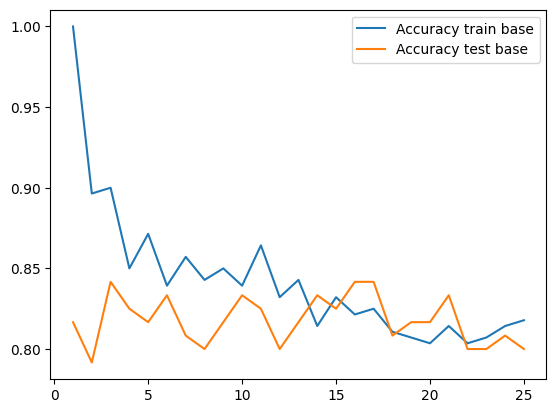

In [14]:
plt.plot(score_train.keys(), score_train.values(), label = 'Accuracy train base')
plt.plot(score_test.keys(), score_test.values(), label = 'Accuracy test base')
plt.legend()
plt.show()